In [26]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리들을 가져옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 라이브러리에서 필요한 모듈들을 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow Keras 라이브러리를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print('✓ 모든 라이브러리가 성공적으로 import되었습니다!')

✓ 모든 라이브러리가 성공적으로 import되었습니다!


In [27]:
from sklearn.preprocessing import RobustScaler

In [52]:
emp_df = pd.read_csv("data/3_employee_salary.csv")
emp_df.isnull().sum()

department            23
experience_years       0
education_level        0
position              31
performance_score     22
projects_completed    27
team_size             21
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

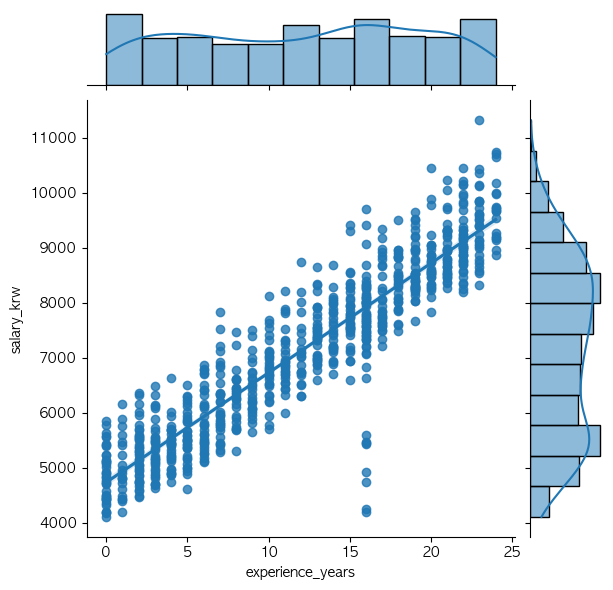

In [53]:
sns.jointplot(data=emp_df, x='experience_years', y='salary_krw', kind='reg')

In [54]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='position', ylabel='count'>

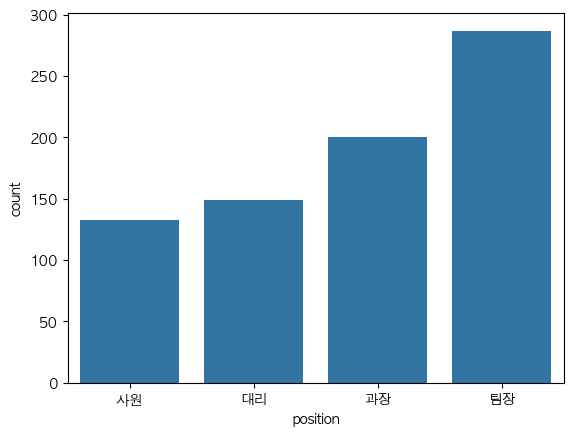

In [55]:
position_order = ['사원','대리','과장','팀장']
sns.countplot(data=emp_df, x='position', order=position_order)

In [56]:
avg_score = emp_df.groupby(['department','position'])['performance_score'].mean()
avg_score

department  position
개발          과장          79.727273
            대리          78.406250
            사원          80.228571
            팀장          80.176471
마케팅         과장          83.653846
            대리          82.750000
            사원          81.516129
            팀장          79.750000
영업          과장          80.452381
            대리          78.562500
            사원          79.689655
            팀장          78.314286
인사          과장          82.711111
            대리          79.106383
            사원          77.419355
            팀장          79.621212
Name: performance_score, dtype: float64

In [57]:
emp_pre = emp_df.copy()
emp_pre

,department,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw
0,인사,8.0,석사,대리,78.0,11.0,6.0,12.0,상,6600.0
1,인사,18.0,학사,팀장,85.0,17.0,9.0,76.0,하,8072.0
2,영업,2.0,학사,사원,64.0,3.0,4.0,96.0,중,4488.0
3,영업,9.0,학사,과장,62.0,16.0,NaN,37.0,중,6330.0
4,영업,6.0,학사,대리,93.0,15.0,13.0,16.0,중,5433.0
...,...,...,...,...,...,...,...,...,...,...
795,마케팅,10.0,석사,과장,100.0,18.0,2.0,18.0,상,7542.0
796,마케팅,12.0,학사,과장,77.0,10.0,NaN,57.0,중,6516.0
797,개발,23.0,박사,팀장,89.0,15.0,12.0,30.0,상,11322.0
798,마케팅,23.0,학사,팀장,76.0,12.0,4.0,74.0,하,8586.0


In [58]:
# performance_score, projects_completed, team_size 는 평균으로 채우기
null_to_mean_list = ['performance_score','projects_completed','team_size']
for col in null_to_mean_list:
    mean_val = emp_pre[col].mean()
    emp_pre[col].fillna(mean_val, inplace=True)

emp_pre.isnull().sum()

department            23
experience_years       0
education_level        0
position              31
performance_score      0
projects_completed     0
team_size              0
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

In [59]:
emp_pre.dropna(subset=['department','position','education_level'], inplace=True)
emp_pre.isnull().sum()

department            0
experience_years      0
education_level       0
position              0
performance_score     0
projects_completed    0
team_size             0
training_hours        0
language_skill        0
salary_krw            0
dtype: int64

In [60]:
'''
[문제07] 숫자가 있는 범주형 데이터(education_level, position, language_skill)를 모델이 이해할 수 있는 숫자형으로 변환하려고 합니다. map()함수를 사용하여 아래의 규칙에 따라 각 컬럼을 직접 인코딩하세요.
- education_level: 고졸=0, 학사=1, 석사=2, 박사=3
- position : 사원=0, 대리=1, 과장=2, 팀장=3
- language_skill : 하=0, 중=1, 상=2
- 힌트 : department 컬럼은 get_dummies를 사용할 예정이므로 이 문제에서는 제외합니다.
'''

'\n[문제07] 숫자가 있는 범주형 데이터(education_level, position, language_skill)를 모델이 이해할 수 있는 숫자형으로 변환하려고 합니다. map()함수를 사용하여 아래의 규칙에 따라 각 컬럼을 직접 인코딩하세요.\n- education_level: 고졸=0, 학사=1, 석사=2, 박사=3\n- position : 사원=0, 대리=1, 과장=2, 팀장=3\n- language_skill : 하=0, 중=1, 상=2\n- 힌트 : department 컬럼은 get_dummies를 사용할 예정이므로 이 문제에서는 제외합니다.\n'

In [61]:
education_level_map = {'고졸' : 0, '학사' : 1, '석사' : 2, '박사' : 3}
position_map = {'사원' : 0, '대리' : 1, '과장' : 2, '팀장' : 3}
language_skill_map = {'하' : 0, '중' : 1, '상' : 2}

emp_pre['education_level'] = emp_pre['education_level'].map(education_level_map)
emp_pre['position'] = emp_pre['position'].map(position_map)
emp_pre['language_skill'] = emp_pre['language_skill'].map(language_skill_map)

emp_pre.head()

,department,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw
0,인사,8.0,2,1,78.0,11.0,6.000000,12.0,2,6600.0
1,인사,18.0,1,3,85.0,17.0,9.000000,76.0,0,8072.0
2,영업,2.0,1,0,64.0,3.0,4.000000,96.0,1,4488.0
3,영업,9.0,1,2,62.0,16.0,7.359435,37.0,1,6330.0
4,영업,6.0,1,1,93.0,15.0,13.000000,16.0,1,5433.0


In [62]:
'''
[문제08] 순서가 없는 범주형 데이터(department)를 원-핫 인코딩으로 변환하고, 훈련과 검증에 사용할 데이터셋을 분리하려고 합니다. 아래 순서에 따라 코드를 작성하세요.
- pandas의 get_dummies() 함수를 사용하여 department 컬럼을 원-핫 인코딩하고, 결과를 emp_encoded 변수에 저장하세요.
- emp_encoded 데이터셋에서 salary_krw 컬럼을 label y로, 나머지 컬럼들을 feature X로 할당하세요.
- train_test_split 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 8:2 비율로 분리하세요.(random_state=123)
'''

'\n[문제08] 순서가 없는 범주형 데이터(department)를 원-핫 인코딩으로 변환하고, 훈련과 검증에 사용할 데이터셋을 분리하려고 합니다. 아래 순서에 따라 코드를 작성하세요.\n- pandas의 get_dummies() 함수를 사용하여 department 컬럼을 원-핫 인코딩하고, 결과를 emp_encoded 변수에 저장하세요.\n- emp_encoded 데이터셋에서 salary_krw 컬럼을 label y로, 나머지 컬럼들을 feature X로 할당하세요.\n- train_test_split 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 8:2 비율로 분리하세요.(random_state=123)\n'

In [63]:
emp_encoded = pd.get_dummies(emp_pre, columns=['department'])
emp_encoded

,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw,department_개발,department_마케팅,department_영업,department_인사
0,8.0,2,1,78.0,11.0,6.000000,12.0,2,6600.0,False,False,False,True
1,18.0,1,3,85.0,17.0,9.000000,76.0,0,8072.0,False,False,False,True
2,2.0,1,0,64.0,3.0,4.000000,96.0,1,4488.0,False,False,True,False
3,9.0,1,2,62.0,16.0,7.359435,37.0,1,6330.0,False,False,True,False
4,6.0,1,1,93.0,15.0,13.000000,16.0,1,5433.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,10.0,2,2,100.0,18.0,2.000000,18.0,2,7542.0,False,True,False,False
796,12.0,1,2,77.0,10.0,7.359435,57.0,1,6516.0,False,True,False,False
797,23.0,3,3,89.0,15.0,12.000000,30.0,2,11322.0,True,False,False,False
798,23.0,1,3,76.0,12.0,4.000000,74.0,0,8586.0,False,True,False,False


In [64]:
#emp_encoded 데이터셋에서 salary_krw 컬럼을 label y로, 나머지 컬럼들을 feature X로 할당하세요.
#train_test_split 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 8:2 비율로 분리하세요.(random_state=123)
from sklearn.model_selection import train_test_split

X = emp_encoded.drop(['salary_krw'], axis=1)
y = emp_encoded['salary_krw']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(597, 12) (150, 12)
(597,) (150,)


In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_trian_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit(X_valid)

In [66]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf', C=1.0)
model_svr.fit(X_trian_scaled, y_train)

SVR()

In [67]:
'''
[문제11]
'''

'\n[문제11]\n'

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=123)

model_gbr.fit(X_trian_scaled, y_train)

importances = model_gbr.feature_importances_
feature_names = X.columns
most_important_idx = np.argmax(importances)
most_important_feature = feature_names[most_important_idx]

답안11 = most_important_feature

print(f"가장 중요한 특성 : {답안11}")

가장 중요한 특성 : experience_years


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

svr_pred = model_svr.predict(X_valid_scaled)
svr_mse = mean_squared_error(y_valid, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_valid, svr_pred)
